### Import necessary Libraries

In [4]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1

### Define Foursquare Credentials and Version

In [5]:
CLIENT_ID = 'JYB1BWEJX51YUKQSFM4N3EZQRKZ1FGILRPHWI2YDLLBCWKN2' # your Foursquare ID
CLIENT_SECRET = 'RG5WCANSLUT30Z55MWRUMPI1M02XOIBIGR25KDKH4RIHWYXN' # your Foursquare Secret
VERSION = '20181018'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JYB1BWEJX51YUKQSFM4N3EZQRKZ1FGILRPHWI2YDLLBCWKN2
CLIENT_SECRET:RG5WCANSLUT30Z55MWRUMPI1M02XOIBIGR25KDKH4RIHWYXN


### Let's use standard New York City Longitude and Latitude as the reference point

In [6]:
search_query = 'museum'
latitude = 40.7128
longitude = -74.0060
radius = 10000
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url


'https://api.foursquare.com/v2/venues/search?client_id=JYB1BWEJX51YUKQSFM4N3EZQRKZ1FGILRPHWI2YDLLBCWKN2&client_secret=RG5WCANSLUT30Z55MWRUMPI1M02XOIBIGR25KDKH4RIHWYXN&ll=40.7128,-74.006&v=20181018&query=museum&radius=10000&limit=100'

In [7]:
results = requests.get(url).json()
results


{'meta': {'code': 200, 'requestId': '5e9eb102be61c9001b16740f'},
 'response': {'venues': [{'id': '4b6b5abff964a520fb022ce3',
    'name': 'National September 11 Memorial & Museum (National September 11 Memorial)',
    'location': {'address': '180 Greenwich St',
     'crossStreet': 'btwn Liberty & Fulton St',
     'lat': 40.71145106322093,
     'lng': -74.0134334564209,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.71145106322093,
       'lng': -74.0134334564209},
      {'label': 'entrance', 'lat': 40.711481, 'lng': -74.012691}],
     'distance': 644,
     'postalCode': '10006',
     'cc': 'US',
     'city': 'New York',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['180 Greenwich St (btwn Liberty & Fulton St)',
      'New York, NY 10006',
      'United States']},
    'categories': [{'id': '5642206c498e4bfca532186c',
      'name': 'Memorial Site',
      'pluralName': 'Memorial Sites',
      'shortName': 'Memorial Site',
      'icon': {'pref

In [8]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '5642206c498e4bfca532186c', 'name': 'M...",False,4b6b5abff964a520fb022ce3,180 Greenwich St,US,New York,United States,btwn Liberty & Fulton St,644,"[180 Greenwich St (btwn Liberty & Fulton St), ...","[{'label': 'display', 'lat': 40.71145106322093...",40.711451,-74.013433,NaN,10006,NY,National September 11 Memorial & Museum (Natio...,v-1587458301,NaN
1,"[{'id': '4bf58dd8d48988d190941735', 'name': 'H...",False,49d4bb1bf964a5204b5c1fe3,36 Battery Pl,US,New York,United States,just NW of Battery Park,1269,"[36 Battery Pl (just NW of Battery Park), New ...","[{'label': 'display', 'lat': 40.70592151884575...",40.705922,-74.017997,NaN,10280,NY,Museum of Jewish Heritage,v-1587458301,NaN
2,"[{'id': '4bf58dd8d48988d181941735', 'name': 'M...",False,5df18d37db204c00076d525a,558 Broadway,US,New York,United States,NaN,1412,"[558 Broadway, New York, NY 10012, United States]","[{'label': 'display', 'lat': 40.723917, 'lng':...",40.723917,-73.997941,NaN,10012,NY,Museum Of Ice Cream NYC,v-1587458301,NaN
3,"[{'id': '4bf58dd8d48988d190941735', 'name': 'H...",False,4ab67030f964a520187720e3,12 Fulton St,US,New York,United States,btwn Water and South St,651,"[12 Fulton St (btwn Water and South St), New Y...","[{'label': 'display', 'lat': 40.70720445017337...",40.707204,-74.003729,NaN,10038,NY,South Street Seaport Museum,v-1587458301,89016396
4,"[{'id': '4bf58dd8d48988d18f941735', 'name': 'A...",False,421a7600f964a5209d1f1fe3,99 Gansevoort St,US,New York,United States,btwn 10th Ave & Washington St,2982,[99 Gansevoort St (btwn 10th Ave & Washington ...,"[{'label': 'display', 'lat': 40.73950559637330...",40.739506,-74.008861,Meatpac,10014,NY,Whitney Museum of American Art,v-1587458301,NaN


In [9]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,National September 11 Memorial & Museum (Natio...,Memorial Site,180 Greenwich St,US,New York,United States,btwn Liberty & Fulton St,644,"[180 Greenwich St (btwn Liberty & Fulton St), ...","[{'label': 'display', 'lat': 40.71145106322093...",40.711451,-74.013433,NaN,10006,NY,4b6b5abff964a520fb022ce3
1,Museum of Jewish Heritage,History Museum,36 Battery Pl,US,New York,United States,just NW of Battery Park,1269,"[36 Battery Pl (just NW of Battery Park), New ...","[{'label': 'display', 'lat': 40.70592151884575...",40.705922,-74.017997,NaN,10280,NY,49d4bb1bf964a5204b5c1fe3
2,Museum Of Ice Cream NYC,Museum,558 Broadway,US,New York,United States,NaN,1412,"[558 Broadway, New York, NY 10012, United States]","[{'label': 'display', 'lat': 40.723917, 'lng':...",40.723917,-73.997941,NaN,10012,NY,5df18d37db204c00076d525a
3,South Street Seaport Museum,History Museum,12 Fulton St,US,New York,United States,btwn Water and South St,651,"[12 Fulton St (btwn Water and South St), New Y...","[{'label': 'display', 'lat': 40.70720445017337...",40.707204,-74.003729,NaN,10038,NY,4ab67030f964a520187720e3
4,Whitney Museum of American Art,Art Museum,99 Gansevoort St,US,New York,United States,btwn 10th Ave & Washington St,2982,[99 Gansevoort St (btwn 10th Ave & Washington ...,"[{'label': 'display', 'lat': 40.73950559637330...",40.739506,-74.008861,Meatpac,10014,NY,421a7600f964a5209d1f1fe3
5,9/11 Museum Foundation Hall,Historic Site,180 Greenwich St,US,New York,United States,NaN,603,"[180 Greenwich St, New York, NY 10007, United ...","[{'label': 'display', 'lat': 40.71154865315634...",40.711549,-74.012961,NaN,10007,NY,576c0c9a498e5fc81569784f
6,Leslie+Lohman Museum of Gay & Lesbian Art,Art Gallery,28-26 Wooster St,US,New York,United States,Grand St,1027,"[28-26 Wooster St (Grand St), New York, NY 100...","[{'label': 'display', 'lat': 40.72177971162039...",40.721780,-74.003170,NaN,10013,NY,4ba3fd9bf964a520147538e3
7,9/11 Museum Gift Shop,Gift Shop,180 Greenwich St,US,New York,United States,at Liberty St,599,"[180 Greenwich St (at Liberty St), New York, N...","[{'label': 'display', 'lat': 40.71164624294874...",40.711646,-74.012940,NaN,10007,NY,5376a2e011d20d02a0831221
8,Museum at Eldridge Street,Museum,12 Eldridge St,US,New York,United States,btwn Canal & Division St,1076,"[12 Eldridge St (btwn Canal & Division St), Ne...","[{'label': 'display', 'lat': 40.714724, 'lng':...",40.714724,-73.993497,NaN,10002,NY,4b37a3c9f964a5207e4325e3
9,National September 11 Memorial Museum,History Museum,180 Greenwich St,US,New York,United States,btwn Liberty & Fulton St,588,"[180 Greenwich St (btwn Liberty & Fulton St), ...","[{'label': 'display', 'lat': 40.7114673282201,...",40.711467,-74.012747,NaN,10006,NY,4e70a36d922e8e01baadf45c


In [12]:
dff=dataframe_filtered[['name','categories','id','state']]
dff.head()

,name,categories,id,state
0,National September 11 Memorial & Museum (Natio...,Memorial Site,4b6b5abff964a520fb022ce3,NY
1,Museum of Jewish Heritage,History Museum,49d4bb1bf964a5204b5c1fe3,NY
2,Museum Of Ice Cream NYC,Museum,5df18d37db204c00076d525a,NY
3,South Street Seaport Museum,History Museum,4ab67030f964a520187720e3,NY
4,Whitney Museum of American Art,Art Museum,421a7600f964a5209d1f1fe3,NY


In [11]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the New York Central

# add a red circle marker to represent the New York Central
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='New York Central',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the queried museums as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

## Create a location dataframe with Rating and Likes

In [77]:
# prepare neighborhood list that contains my search query
def get_venue_details(venue_id):
        
       
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


# prepare neighborhood list that contains my search query
column_names=['Name', 'Categories', 'ID','Likes','Rating','Tips']
df_query=pd.DataFrame(columns=column_names)
count=1


for row in dff.values.tolist():
    name,categories,ID,state=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except (IndexError, KeyError) as e:
        print('No data available for id=',ID)
        # we will assign 0 value for these venuew as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(dff),')','processed')
    df_query = df_query.append({'Name': name,
                                                'Categories': categories, 
                                                'ID': id,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID  \
0  4b6b5abff964a520fb022ce3   

                                                Name  Likes  Rating  Tips  
0  National September 11 Memorial & Museum (Natio...   7413     9.2   878  
( 1 / 50 ) processed
                         ID                       Name  Likes  Rating  Tips
0  49d4bb1bf964a5204b5c1fe3  Museum of Jewish Heritage    193     8.1    60
( 2 / 50 ) processed
                         ID                     Name  Likes  Rating  Tips
0  5df18d37db204c00076d525a  Museum Of Ice Cream NYC     12     7.9     4
( 3 / 50 ) processed
                         ID                         Name  Likes  Rating  Tips
0  4ab67030f964a520187720e3  South Street Seaport Museum     42     8.1    14
( 4 / 50 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 576c0c9a498e5fc81569784f
( 5 / 50 ) processed
                         ID                       Name  Likes  Rating  Tips
0  4b37a3c9f964a5207e4325e3  M

In [78]:
df_query = df_query.replace(0, np.NaN)

df_query[['Rating','Likes']].mean()


print("Average rating of " + search_query + " : " + str(df_query['Rating'].mean()))

print("Average likes of " + search_query + " : " + str(df_query['Likes'].mean()))

Average rating of museum : 8.16111111111111
Average likes of museum : 1852.8055555555557


## New York Shopping Query

In [79]:
search_query = 'mall'
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
dff=dataframe_filtered[['name','categories','id','state']]

# prepare neighborhood list that contains my search query
def get_venue_details(venue_id):
        
       
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


# prepare neighborhood list that contains my search query
column_names=['Name', 'Categories', 'ID','Likes','Rating','Tips']
df_query=pd.DataFrame(columns=column_names)
count=1


for row in dff.values.tolist():
    name,categories,ID,state=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except (IndexError, KeyError) as e:
        print('No data available for id=',ID)
        # we will assign 0 value for these venuew as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(dff),')','processed')
    df_query = df_query.append({'Name': name,
                                                'Categories': categories, 
                                                'ID': id,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
    

    
    


Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4ec3cc39b63468c86d4c0737
( 1 / 50 ) processed
                         ID         Name  Likes  Rating  Tips
0  4a5e557ff964a52062be1fe3  Fulton Mall    100     5.8    15
( 2 / 50 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4e49305718a8f9804cec69db
( 3 / 50 ) processed
                         ID            Name  Likes  Rating  Tips
0  4a19bdd6f964a520477a1fe3  Manhattan Mall    436     5.7   110
( 4 / 50 ) processed
                         ID        Name  Likes  Rating  Tips
0  4c3f9e76da3dc928762ec6b9  Metro Mall     35     5.4    19
( 5 / 50 ) processed
                         ID               Name  Likes  Rating  Tips
0  49ebbf61f964a52020671fe3  Central Park Mall    196     9.2    40
( 6 / 50 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4ec3c8d28b8132e083478aaf
( 7 / 50

In [80]:
df_query = df_query.replace(0, np.NaN)

df_query[['Rating','Likes']].mean()


print("Average rating of " + search_query + " : " + str(df_query['Rating'].mean()))

print("Average likes of " + search_query + " : " + str(df_query['Likes'].mean()))

Average rating of mall : 6.599999999999999
Average likes of mall : 205.88888888888889


## New York Restaurant Query

In [12]:
search_query = 'restaurant'
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
dff=dataframe_filtered[['name','categories','id','state']]

dff


    
    


,name,categories,id,state
0,TJ Byrnes Bar and Restaurant,Restaurant,4b4fdfc8f964a520801827e3,NY
1,Amore's Pizza Restaurant,Pizza Place,4bc238adf8219c744286b410,NY
2,Hop Shing Restaurant 合誠茶樓,Dim Sum Restaurant,4b38c437f964a520245025e3,NY
3,Bo Ky Restaurant 波記潮州小食,Chinese Restaurant,4a00df67f964a520ba701fe3,NY
4,O'Hara's Restaurant & Pub,Pub,49f125dcf964a52091691fe3,NY
5,Mudville Restaurant & Tap House,Wings Joint,45e5c256f964a52046431fe3,NY
6,Wing Kee WK Restaurant 榮記飯店 (former 69),Chinese Restaurant,56fd4c5e498e389de05f8b85,NY
7,Jing Fong Restaurant 金豐大酒樓,Dim Sum Restaurant,3fd66200f964a520d5e31ee3,NY
8,J.J. Noodle Restaurant 好旺角,Chinese Restaurant,4fc6b859e4b01d7243896110,NY
9,New Shezan Restaurant,Middle Eastern Restaurant,4c4890da1879c9b6cce6e143,NY


In [13]:
# prepare list that contains my search query
def get_venue_details(venue_id):
        
       
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


# prepare list that contains my search query
column_names=['Name', 'Categories', 'ID','Likes','Rating','Tips']
df_query=pd.DataFrame(columns=column_names)
count=1


for row in dff.values.tolist():
    name,categories,ID,state=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except (IndexError, KeyError) as e:
        print('No data available for id=',ID)
        # we will assign 0 value for these venuew as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(dff),')','processed')
    df_query = df_query.append({'Name': name,
                                                'Categories': categories, 
                                                'ID': id,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
    


                         ID                          Name  Likes  Rating  Tips
0  4b4fdfc8f964a520801827e3  TJ Byrnes Bar and Restaurant     27     7.0    10
( 1 / 50 ) processed
                         ID                      Name  Likes  Rating  Tips
0  4bc238adf8219c744286b410  Amore's Pizza Restaurant     18     6.4    10
( 2 / 50 ) processed
                         ID                       Name  Likes  Rating  Tips
0  4b38c437f964a520245025e3  Hop Shing Restaurant 合誠茶樓     93     6.9    58
( 3 / 50 ) processed
                         ID                     Name  Likes  Rating  Tips
0  4a00df67f964a520ba701fe3  Bo Ky Restaurant 波記潮州小食    137     7.8    74
( 4 / 50 ) processed
                         ID                       Name  Likes  Rating  Tips
0  49f125dcf964a52091691fe3  O'Hara's Restaurant & Pub    310     8.3    98
( 5 / 50 ) processed
                         ID                             Name  Likes  Rating  \
0  45e5c256f964a52046431fe3  Mudville Restaurant & Tap H

In [14]:
df_query = df_query.replace(0, np.NaN)

df_query[['Rating','Likes']].mean()


print("Average rating of " + search_query + " : " + str(df_query['Rating'].mean()))

print("Average likes of " + search_query + " : " + str(df_query['Likes'].mean()))

Average rating of restaurant : 7.158620689655173
Average likes of restaurant : 155.27586206896552


## New York Financial Institutions Query

In [15]:
search_query = 'bank'
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
dff=dataframe_filtered[['name','categories','id','state']]

dff

,name,categories,id,state
0,Bank Of America,Bank,4cd8c8b97d4546884c9beded,NY
1,Chase Bank,Bank,4c33e80116adc9280d75c49c,NY
2,Emigrant Savings Bank,Bank,4cc86584ee718cfa9b05b83d,NY
3,Bank of New York Mellon,Office,4bfbd2f9565f76b0e40306db,NY
4,Chase Bank,Bank,4c0505999a7920a1befcd179,NY
5,West Bank Gourmet,Gourmet Shop,4b50e2a6f964a520e83627e3,NY
6,Chase Bank,Bank,4b660185f964a520e30d2be3,NY
7,Chase Bank,Bank,4b52a06df964a5204e8427e3,NY
8,Deutsche Bank,Bank,4b2d5a59f964a520e9d424e3,NY
9,Bank Of America Offices,Conference Room,4c1a5d03b9f876b03b887846,NY


In [17]:
# prepare list that contains my search query
def get_venue_details(venue_id):
        
       
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


# prepare list that contains my search query
column_names=['Name', 'Categories', 'ID','Likes','Rating','Tips']
df_query=pd.DataFrame(columns=column_names)
count=1


for row in dff.values.tolist():
    name,categories,ID,state=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except (IndexError, KeyError) as e:
        print('No data available for id=',ID)
        # we will assign 0 value for these venuew as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(dff),')','processed')
    df_query = df_query.append({'Name': name,
                                                'Categories': categories, 
                                                'ID': id,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
    


                         ID             Name  Likes  Rating  Tips
0  4cd8c8b97d4546884c9beded  Bank Of America      3     6.2     0
( 1 / 50 ) processed
                         ID        Name  Likes  Rating  Tips
0  4c33e80116adc9280d75c49c  Chase Bank      6     6.3     8
( 2 / 50 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4cc86584ee718cfa9b05b83d
( 3 / 50 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4bfbd2f9565f76b0e40306db
( 4 / 50 ) processed
                         ID        Name  Likes  Rating  Tips
0  4c0505999a7920a1befcd179  Chase Bank      6     7.1     2
( 5 / 50 ) processed
                         ID               Name  Likes  Rating  Tips
0  4b50e2a6f964a520e83627e3  West Bank Gourmet     17     7.8     8
( 6 / 50 ) processed
                         ID        Name  Likes  Rating  Tips
0  4b660185f964a520e30d2be3  Chase Bank      6     6.5     0
( 7 

In [18]:
df_query = df_query.replace(0, np.NaN)

df_query[['Rating','Likes']].mean()


print("Average rating of " + search_query + " : " + str(df_query['Rating'].mean()))

print("Average likes of " + search_query + " : " + str(df_query['Likes'].mean()))

Average rating of bank : 6.434482758620691
Average likes of bank : 10.653846153846153


### Let's use standard Toronto longitude and Latitude as the reference point

In [9]:
search_query = 'museum'
latitude = 43.6532
longitude= -79.3832
radius = 10000
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url


'https://api.foursquare.com/v2/venues/search?client_id=JYB1BWEJX51YUKQSFM4N3EZQRKZ1FGILRPHWI2YDLLBCWKN2&client_secret=RG5WCANSLUT30Z55MWRUMPI1M02XOIBIGR25KDKH4RIHWYXN&ll=43.6532,-79.3832&v=20181018&query=museum&radius=10000&limit=100'

In [10]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e9eb14b6001fe001cd9fda6'},
 'response': {'venues': [{'id': '4ad4c05ef964a520e2f620e3',
    'name': 'Textile Museum of Canada',
    'location': {'address': '55 Centre Avenue',
     'crossStreet': 'University Ave. and Dundas St W.',
     'lat': 43.65439630500274,
     'lng': -79.38650010906946,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.65439630500274,
       'lng': -79.38650010906946}],
     'distance': 297,
     'postalCode': 'M5G 2H5',
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['55 Centre Avenue (University Ave. and Dundas St W.)',
      'Toronto ON M5G 2H5',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d18f941735',
      'name': 'Art Museum',
      'pluralName': 'Art Museums',
      'shortName': 'Art Museum',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/museum_art_',
       'suffix': '.png'},
      'primary

### Toronto York Museum Query

In [11]:
search_query = 'museum'
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
dff=dataframe_filtered[['name','categories','id','state']]

dataframe_filtered


,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Textile Museum of Canada,Art Museum,55 Centre Avenue,CA,Toronto,Canada,University Ave. and Dundas St W.,297,[55 Centre Avenue (University Ave. and Dundas ...,"[{'label': 'display', 'lat': 43.65439630500274...",43.654396,-79.386500,NaN,M5G 2H5,ON,4ad4c05ef964a520e2f620e3
1,Museum Subway Station,Metro Station,75 Queen's Park,CA,Toronto,Canada,at Charles St. W.,1758,"[75 Queen's Park (at Charles St. W.), Toronto ...","[{'label': 'display', 'lat': 43.66704896485094...",43.667049,-79.393709,NaN,M5S 1K7,ON,4b100955f964a520d36723e3
2,Museum Of The End Of The World,Museum,NaN,CA,NaN,Canada,NaN,205,[Canada],"[{'label': 'display', 'lat': 43.654061, 'lng':...",43.654061,-79.385452,NaN,NaN,NaN,5067d4fce4b0322cccad80a7
3,Museum Dental,Dentist's Office,206 A Bloor Street West,CA,Toronto,Canada,NaN,1943,"[206 A Bloor Street West, Toronto ON M5S 1T8, ...","[{'label': 'display', 'lat': 43.6681513780897,...",43.668151,-79.395665,NaN,M5S 1T8,ON,50d338eee4b006c472458f13
4,Royal Ontario Museum,Museum,100 Queen's Pk,CA,Toronto,Canada,at Bloor St. W.,1930,"[100 Queen's Pk (at Bloor St. W.), Toronto ON ...","[{'label': 'display', 'lat': 43.66836706561604...",43.668367,-79.394813,University,M5S 2C6,ON,4ad4c05ef964a520d9f620e3
5,Royal Ontario Museum Library & Archives,Library,100 Queen's Park,CA,Toronto,Canada,NaN,1788,"[100 Queen's Park, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.66697532803326...",43.666975,-79.394620,NaN,NaN,ON,4e8ef8d3dab454671eede3b6
6,Friar’s Music Museum,Museum,NaN,CA,Toronto,Canada,NaN,353,"[Toronto ON M5B 1N8, Canada]","[{'label': 'display', 'lat': 43.655662, 'lng':...",43.655662,-79.380426,NaN,M5B 1N8,ON,5c241d5d1cf2e1002c79a26b
7,Museum Of Illusions,Museum,132 Front Street East,CA,Toronto,Canada,Frederick St,1156,"[132 Front Street East (Frederick St), Toronto...","[{'label': 'display', 'lat': 43.650219, 'lng':...",43.650219,-79.369451,NaN,M5A 1E2,ON,5be625b081635b002c676360
8,Campbell House Museum,Monument / Landmark,160 Queen Street West,CA,Toronto,Canada,NaN,419,"[160 Queen Street West, Toronto ON M5H 3H3, Ca...","[{'label': 'display', 'lat': 43.65072022256572...",43.650720,-79.387128,NaN,M5H 3H3,ON,4ad4c05ef964a520a7f620e3
9,48Th Highlanders Museum,History Museum,73 Simcoe Street,CA,Toronto,Canada,King Street,732,"[73 Simcoe Street (King Street), Toronto ON M5...","[{'label': 'display', 'lat': 43.64689, 'lng': ...",43.646890,-79.385760,NaN,M5J 1W9,ON,5b3e4a44bed483002b1536df


In [37]:
# prepare list that contains my search query
def get_venue_details(venue_id):
        
       
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


# prepare list that contains my search query
column_names=['Name', 'Categories', 'ID','Likes','Rating','Tips']
df_query=pd.DataFrame(columns=column_names)
count=1


for row in dff.values.tolist():
    name,categories,ID,state=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except (IndexError, KeyError) as e:
        print('No data available for id=',ID)
        # we will assign 0 value for these venuew as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(dff),')','processed')
    df_query = df_query.append({'Name': name,
                                                'Categories': categories, 
                                                'ID': id,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
    

                         ID                      Name  Likes  Rating  Tips
0  4ad4c05ef964a520e2f620e3  Textile Museum of Canada     25     7.8     7
( 1 / 44 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4b100955f964a520d36723e3
( 2 / 44 ) processed
                         ID                  Name  Likes  Rating  Tips
0  4ad4c05ef964a520d9f620e3  Royal Ontario Museum   1489     9.1   246
( 3 / 44 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 50d338eee4b006c472458f13
( 4 / 44 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 5067d4fce4b0322cccad80a7
( 5 / 44 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4e8ef8d3dab454671eede3b6
( 6 / 44 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 5c241d5d1cf2e1002

In [38]:
df_query = df_query.replace(0, np.NaN)

df_query[['Rating','Likes']].mean()


print("Average rating of " + search_query + " : " + str(df_query['Rating'].mean()))

print("Average likes of " + search_query + " : " + str(df_query['Likes'].mean()))

Average rating of museum : 7.794117647058823
Average likes of museum : 128.58823529411765


### Toronto York Restaurant Query

In [41]:
search_query = 'restaurant'
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
dff=dataframe_filtered[['name','categories','id','state']]

dff

,name,categories,id,state
0,Hemispheres Restaurant & Bistro,American Restaurant,4ad4c05ff964a52048f720e3,ON
1,Victoria's Restaurant,Restaurant,4ad4c05cf964a52006f620e3,ON
2,Goldstone Noodle Restaurant 金石,Noodle House,4b266f05f964a520657b24e3,ON
3,New Sky Restaurant 小沙田食家,Chinese Restaurant,4b074bb1f964a52077fb22e3,ON
4,Swatow Restaurant 汕頭小食家,Chinese Restaurant,4ae29812f964a520288f21e3,ON
5,Some Time BBQ Grill Restaurant 碳烤屋,Szechuan Restaurant,5750b013498e755287c6de97,ON
6,Studio Restaurant,Breakfast Spot,4bd47e6fcfa7b7139f2924da,ON
7,Azure Restaurant & Bar,Restaurant,4b223f5af964a520ba4424e3,ON
8,360 Restaurant,Wine Bar,4ad4c05cf964a520dff520e3,ON
9,The Hot House Restaurant & Bar,American Restaurant,4ada5d5bf964a520e92121e3,ON


In [42]:
# prepare list that contains my search query
def get_venue_details(venue_id):
        
       
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


# prepare list that contains my search query
column_names=['Name', 'Categories', 'ID','Likes','Rating','Tips']
df_query=pd.DataFrame(columns=column_names)
count=1


for row in dff.values.tolist():
    name,categories,ID,state=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except (IndexError, KeyError) as e:
        print('No data available for id=',ID)
        # we will assign 0 value for these venuew as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(dff),')','processed')
    df_query = df_query.append({'Name': name,
                                                'Categories': categories, 
                                                'ID': id,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
    

                         ID                             Name  Likes  Rating  \
0  4ad4c05ff964a52048f720e3  Hemispheres Restaurant & Bistro     10     6.3   

   Tips  
0     5  
( 1 / 50 ) processed
                         ID                   Name  Likes  Rating  Tips
0  4ad4c05cf964a52006f620e3  Victoria's Restaurant      6     7.7     2
( 2 / 50 ) processed
                         ID                            Name  Likes  Rating  \
0  4b266f05f964a520657b24e3  Goldstone Noodle Restaurant 金石     47     6.3   

   Tips  
0    30  
( 3 / 50 ) processed
                         ID                      Name  Likes  Rating  Tips
0  4b074bb1f964a52077fb22e3  New Sky Restaurant 小沙田食家     35     7.7    14
( 4 / 50 ) processed
                         ID                     Name  Likes  Rating  Tips
0  4ae29812f964a520288f21e3  Swatow Restaurant 汕頭小食家     87     7.7    57
( 5 / 50 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 5750

In [43]:
df_query = df_query.replace(0, np.NaN)

df_query[['Rating','Likes']].mean()


print("Average rating of " + search_query + " : " + str(df_query['Rating'].mean()))

print("Average likes of " + search_query + " : " + str(df_query['Likes'].mean()))

Average rating of restaurant : 6.968965517241379
Average likes of restaurant : 68.17241379310344


### Toronto York Shopping Query

In [44]:
search_query = 'mall'
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
dff=dataframe_filtered[['name','categories','id','state']]

dff

,name,categories,id,state
0,Dragon City Shopping Mall 龍城,Shopping Mall,4ad4c062f964a520fcf720e3,ON
1,Dufferin Mall,Shopping Mall,4ad799fff964a520a50c21e3,ON
2,Galleria Offices (above Eaton Centre Mall),Conference Room,4e39a32eb0fb2f7ee86994bb,ON
3,CF Toronto Eaton Centre,Shopping Mall,4ad77a12f964a520260b21e3,ON
4,Mobile Klinik Professional Smartphone Repair -...,Mobile Phone Shop,5c9778c967af3a002b2901fb,ON
5,Dufferin Mall Dental Associates,Dentist's Office,4be181bf0f03a593c17319b4,ON
6,Crossways Mall,Shopping Mall,4bc5b9db6c26b713049eebf3,ON
7,Kensington Mall,Market,57e84e7c498e3705740463b8,ON
8,Vape Mall,Smoke Shop,5dbc9c1601fa7600076b2576,ON
9,Mall 1,Shopping Mall,56a2eeda498efaecc12b2623,ON


In [45]:
# prepare list that contains my search query
def get_venue_details(venue_id):
        
       
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


# prepare list that contains my search query
column_names=['Name', 'Categories', 'ID','Likes','Rating','Tips']
df_query=pd.DataFrame(columns=column_names)
count=1


for row in dff.values.tolist():
    name,categories,ID,state=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except (IndexError, KeyError) as e:
        print('No data available for id=',ID)
        # we will assign 0 value for these venuew as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(dff),')','processed')
    df_query = df_query.append({'Name': name,
                                                'Categories': categories, 
                                                'ID': id,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID                          Name  Likes  Rating  Tips
0  4ad4c062f964a520fcf720e3  Dragon City Shopping Mall 龍城     21     4.7     8
( 1 / 50 ) processed
                         ID           Name  Likes  Rating  Tips
0  4ad799fff964a520a50c21e3  Dufferin Mall    312     6.1    61
( 2 / 50 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4e39a32eb0fb2f7ee86994bb
( 3 / 50 ) processed
                         ID                     Name  Likes  Rating  Tips
0  4ad77a12f964a520260b21e3  CF Toronto Eaton Centre   2993     8.5   361
( 4 / 50 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 5c9778c967af3a002b2901fb
( 5 / 50 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4be181bf0f03a593c17319b4
( 6 / 50 ) processed
                         ID            Name  Likes  Rating  Tips
0  4bc5b9db6c26b71304

In [46]:
df_query = df_query.replace(0, np.NaN)

df_query[['Rating','Likes']].mean()


print("Average rating of " + search_query + " : " + str(df_query['Rating'].mean()))

print("Average likes of " + search_query + " : " + str(df_query['Likes'].mean()))

Average rating of mall : 5.928571428571429
Average likes of mall : 492.85714285714283


### Toronto York Financial Institution Query

In [47]:
search_query = 'bank'
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
dff=dataframe_filtered[['name','categories','id','state']]

dff

,name,categories,id,state
0,TD Bank Machine,Bank,4c462b76f9652d7fbe46142b,ON
1,Bank of Nova Scotia,Bank,4c811edb6cc2b71380f4169b,ON
2,BMO Bank of Montreal,Bank,524080a011d236aca211fc31,ON
3,Industrial and Commercial Bank of China (Canada),Bank,502403e6e4b0dc22369350e5,ON
4,BMO Bank of Montreal,Bank,4b1d68eef964a520201024e3,ON
5,RBC Royal Bank,Bank,51eaba00498efab8dcac2197,ON
6,RBC Royal Bank,Bank,4d52c4e0dcce224b781cf01b,ON
7,RBC Royal Bank,Bank,4c6043c654ac0f47081db521,ON
8,BMO Bank of Montreal,Bank,4ad9fa30f964a520a61c21e3,ON
9,The Children's Book Bank,Non-Profit,4d3869ab3d958cfa4eb4b271,ON


In [48]:
# prepare list that contains my search query
def get_venue_details(venue_id):
        
       
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


# prepare list that contains my search query
column_names=['Name', 'Categories', 'ID','Likes','Rating','Tips']
df_query=pd.DataFrame(columns=column_names)
count=1


for row in dff.values.tolist():
    name,categories,ID,state=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except (IndexError, KeyError) as e:
        print('No data available for id=',ID)
        # we will assign 0 value for these venuew as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(dff),')','processed')
    df_query = df_query.append({'Name': name,
                                                'Categories': categories, 
                                                'ID': id,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4c462b76f9652d7fbe46142b
( 1 / 50 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4c811edb6cc2b71380f4169b
( 2 / 50 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 524080a011d236aca211fc31
( 3 / 50 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 502403e6e4b0dc22369350e5
( 4 / 50 ) processed
                         ID                  Name  Likes  Rating  Tips
0  4b1d68eef964a520201024e3  BMO Bank of Montreal      8     6.8     4
( 5 / 50 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 51eaba00498efab8dcac2197
( 6 / 50 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4d52c4e0dcce224b781cf01b
( 7 / 50 ) processed
Emp

In [49]:
df_query = df_query.replace(0, np.NaN)

df_query[['Rating','Likes']].mean()


print("Average rating of " + search_query + " : " + str(df_query['Rating'].mean()))

print("Average likes of " + search_query + " : " + str(df_query['Likes'].mean()))

Average rating of bank : 6.233333333333333
Average likes of bank : 5.333333333333333


### Results plotted on grouped barchart

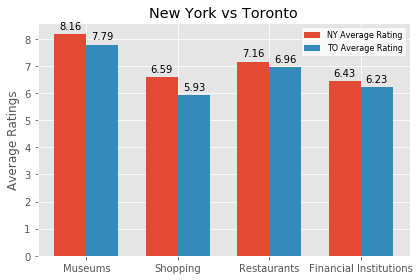

In [51]:
labels = ['Museums', 'Shopping','Restaurants','Financial Institutions']
ny_means = [8.16, 6.59, 7.16, 6.43]
to_means = [7.79, 5.93, 6.96, 6.23]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ny_means, width, label='NY Average Rating')
rects2 = ax.bar(x + width/2, to_means, width, label='TO Average Rating')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Ratings')
ax.set_title('New York vs Toronto')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize=8, facecolor ='white')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


